In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from itertools import combinations
from collections import defaultdict
from collections import Counter
from sklearn.metrics import silhouette_score
import seaborn as sns
import random
from pprint import pprint


In [2]:
from sklearn.model_selection import train_test_split

# Charger le fichier CSV dans un DataFrame
#file_path = "dataset_prétraitement.csv"
#data1 = pd.read_csv(file_path)
with open('dataset_prétraitement.csv', 'r') as file:
    data = [line.strip().split(',') for line in file.readlines() ]
    
def convert_to_float(dataset):
    for i in range(len(dataset)):
        for j in range(len(dataset[i])):
            try:
                dataset[i][j] = float(dataset[i][j])
            except ValueError:
                # Gérer les valeurs qui ne peuvent pas être converties en flottant
                pass # Vous pouvez choisir de remplacer par une valeur par défaut ou de gérer autrement
    return dataset
data=convert_to_float(data)
print(data)
#X1 = data1.drop(columns=['Fertility'])  # Caractéristiques - toutes les colonnes sauf 'Fertility'
#y1 = data1['Fertility']  
X=[]
y=[]
# Séparation des caractéristiques (X) et de la cible (y)
for d in data:
 X.append(d[:-1])  # Caractéristiques
 y.append(d[-1])  # Attribut cible à prédire
y=y[1:]
X=X[1:]
for t in y:
    t=int(t)
#print(X)
#print("y#######")
print(X)
print(len(y))
# Séparation des données en ensembles d'apprentissage et de test (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)




[['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B', 'OM', 'Fertility'], [138.0, 8.6, 560.0, 7.46, 0.62, 0.7, 5.9, 0.24, 0.31, 0.77, 8.71, 0.11, 1.204, 0.0], [213.0, 7.5, 338.0, 7.62, 0.75, 1.06, 3.2347491740244907, 0.3, 0.86, 1.54, 2.89, 0.8285518175661483, 1.8232, 0.0], [163.0, 9.6, 718.0, 7.59, 0.51, 1.11, 14.3, 0.3, 0.86, 1.57, 2.7, 0.7080357930536959, 1.9092, 0.0], [157.0, 6.8, 475.0, 7.64, 0.58, 0.94, 3.258096538021482, 0.34, 0.54, 1.53, 2.65, 0.598836501088704, 1.6168, 0.0], [270.0, 9.9, 444.0, 7.63, 0.4, 0.86, 11.8, 0.25, 0.76, 1.69, 2.43, 0.8153648132841944, 1.4792, 1.0], [220.0, 8.6, 444.0, 7.43, 0.65, 0.72, 11.7, 0.37, 0.66, 0.9, 2.19, 0.598836501088704, 1.2384, 0.0], [220.0, 7.2, 222.0, 7.62, 0.43, 0.81, 7.4, 0.34, 0.69, 1.05, 2.0, 0.6312717768418578, 1.3932, 0.0], [207.0, 7.0, 401.0, 7.63, 0.59, 0.69, 7.6, 0.32, 0.68, 0.62, 2.43, 0.5187937934151675, 1.1868, 0.0], [333.0, 14.9, 422.0, 2.1114245875328868, 0.48, 0.68, 8.45, 0.51, 3.32, 1.08, 9.21, 0.32, 2.0124

ALGORITHME KNN

In [3]:
def euclidean_distance(instance1, instance2):
            
  return np.sqrt(np.sum((instance1 - instance2) ** 2))

def sort_instances_by_distance(instance,X_train,y_train, distance_function):
    distances = [(index, distance_function(instance, X_train)) for index, X_train in enumerate(X_train)]
    distances.sort(key=lambda x: x[1])
    return distances
instance = np.array([138.0,8.6,560.0,7.46,0.62,0.7,5.9,0.24,0.31,0.77,8.71,0.11,1.204])
dis = sort_instances_by_distance(instance,X_train,y_train, euclidean_distance)
print(dis)

def get_majority_class(classes):
  compteur_classes = Counter(classes)
    
    # Obtenir la classe dominante (la plus fréquente)
  classe_dominante = compteur_classes.most_common(1)[0][0]
  return classe_dominante

def k_nearest_neighbors(k, Inst,X_train,y_train ,distance_function):
    distances = sort_instances_by_distance(Inst,X_train,y_train, distance_function)
    knn = distances[:k]
    
    k_nearest_indices = [knns[0] for knns in knn]
    classe=[]
    
    for v in k_nearest_indices:
        classe.append(y_train[v])
    return  get_majority_class(classe)


[(586, 0.0), (234, 7.191849953940919), (442, 12.478038313773524), (408, 14.501172826862234), (202, 22.87288085379641), (374, 25.399339600863645), (166, 25.678403053149548), (134, 25.787816220843517), (593, 33.66164558306679), (285, 33.95688578075762), (422, 38.06723922534966), (197, 43.79198974059069), (324, 44.2972081756853), (338, 44.649709990066484), (539, 45.428286742295946), (61, 45.505918296415025), (143, 45.56098796119329), (386, 50.33954267406683), (415, 51.498575787685624), (247, 52.28818718570799), (631, 52.81663558099623), (337, 53.753353449250035), (76, 54.35344421248759), (410, 54.86344780416192), (215, 58.35930611787635), (689, 59.45179519711747), (127, 61.20283205996272), (37, 61.927568040090186), (218, 63.42069734842089), (262, 63.431899571152094), (437, 63.956854206566476), (282, 64.39854962738333), (577, 65.30392101061008), (656, 65.70320709451961), (299, 66.85950800417245), (313, 67.13814271366165), (207, 67.4533376893983), (68, 68.95152940319743), (350, 68.968671950

In [4]:
new_instance = np.array([138.0,8.6,560.0,7.46,0.62,0.7,5.9,0.24,0.31,0.77,8.71,0.11,1.204])
#print(new_instance)
result_k3 = k_nearest_neighbors(5, new_instance,X_train,y_train, euclidean_distance)
print("Classe avec K=3:", result_k3)

Classe avec K=3: 0.0


In [5]:
from collections import Counter
import numpy as np

# Votre code pour les fonctions euclidean_distance, sort_instances_by_distance, get_majority_class et k_nearest_neighbors

# Supposons que `X_test` contient vos données de test et `y_test` contient les étiquettes de classe réelles correspondantes
# X_train et y_train sont les données d'apprentissage

# Création de la matrice de confusion
def confusion_matrix(X_train, y_train, X_test, y_test, k):
    predictions = []
    
    for instance in X_test:
        instance=np.array(instance)
        prediction = k_nearest_neighbors(k,instance,  X_train, y_train,euclidean_distance)
        predictions.append(prediction)
    
    unique_classes = np.unique(y_test)
    num_classes = len(unique_classes)
    matrix = np.zeros((num_classes, num_classes), dtype=int)

    for i, true_class in enumerate(unique_classes):
        for j, predicted_class in enumerate(unique_classes):
            # Compter le nombre d'occurrences pour chaque combinaison de classes réelles et prédites
            matrix[i, j] = np.sum((y_test == true_class) & (np.array(predictions) == predicted_class))

    return matrix

# Utilisation de la fonction confusion_matrix pour obtenir la matrice de confusion
conf_matrix = confusion_matrix(X_train, y_train, X_test, y_test, 3)
print("Matrice de confusion:")
print(conf_matrix)
num_classes = len(conf_matrix)
global_precision=0
global_recall=0
global_specificity=0
global_f_score=0
# Calcul de l'exactitude globale
total_predictions = sum(sum(row) for row in conf_matrix)
correct_predictions = sum(conf_matrix[i][i] for i in range(num_classes))
accuracy = correct_predictions / total_predictions
print(f"accuracy : {accuracy:.4f}")


# Calcul des mesures pour chaque classe
for i in range(num_classes):
    true_positives = conf_matrix[i][i]
    false_positives = sum(conf_matrix[j][i] for j in range(num_classes) if j != i)
    false_negatives = sum(conf_matrix[i][j] for j in range(num_classes) if j != i)
    true_negatives = sum(
        conf_matrix[j][k]
        for j in range(num_classes) if j != i
        for k in range(num_classes) if k != i
    )

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    global_precision=global_precision+precision
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    global_recall=global_recall+recall
    specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) != 0 else 0
    global_specificity=global_specificity+specificity
    f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    global_f_score=global_f_score+f_score

    print(f"Classe {i}:")
    print(f"Précision : {precision:.4f}")
    print(f"Rappel : {recall:.4f}")
    print(f"Spécificité : {specificity:.4f}")
    print(f"F-score : {f_score:.4f}")
print("\nMesures globales :")
print(f"Précision globale : {global_precision/3:.4f}")
print(f"Rappel globale : {global_recall/3:.4f}")
print(f"Spécificité globale : {global_specificity/3:.4f}")
print(f"F-score globale : {global_f_score/3:.4f}")


Matrice de confusion:
[[76  4  0]
 [14 70  5]
 [ 1  6  1]]
accuracy : 0.8305
Classe 0:
Précision : 0.8352
Rappel : 0.9500
Spécificité : 0.8454
F-score : 0.8889
Classe 1:
Précision : 0.8750
Rappel : 0.7865
Spécificité : 0.8864
F-score : 0.8284
Classe 2:
Précision : 0.1667
Rappel : 0.1250
Spécificité : 0.9704
F-score : 0.1429

Mesures globales :
Précision globale : 0.6256
Rappel globale : 0.6205
Spécificité globale : 0.9007
F-score globale : 0.6200


DECISION TREES


In [6]:
df = pd.read_csv("dataset_prétraitement.csv")
#df = df.drop("Id", axis=1)
df = df.rename(columns={"Fertility": "label"})

def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

random.seed(0)
train_df, test_df = train_test_split(df, test_size=20)

def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):        # excluding the last column which is the label
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value) / 2
                
                potential_splits[column_index].append(potential_split)
    
    return potential_splits

def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values >  split_value]
    
    return data_below, data_above





In [7]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy


In [8]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [10]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [11]:
def decision_tree_algorithm(df, counter=0,max_depth=5):
    # data preparations
    if counter == 0:
        data = df.values
    else:
        data = df           
    # base cases
    if check_purity(data) or (counter == max_depth):
        classification = classify_data(data)
        return classification
    # recursive part
    else:    
        counter += 1
        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value) 
        # instantiate sub-tree
        question = "{} <= {}".format(split_column, split_value)
        sub_tree = {question: []}
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter)
        no_answer = decision_tree_algorithm(data_above, counter)
        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer) 
        return sub_tree

In [12]:
tree = decision_tree_algorithm(train_df)
pprint(tree)

{'0 <= 260.5': [{'1 <= 4.796239642146542': [{'0 <= 198.0': [0.0,
                                                            {'8 <= 2.94': [0.0,
                                                                           {'7 <= 0.255': [0.0,
                                                                                           1.0]}]}]},
                                            {'1 <= 10.4': [{'8 <= 1.04': [{'7 <= 0.535': [0.0,
                                                                                          0.0]},
                                                                          {'0 <= 241.5': [0.0,
                                                                                          0.0]}]},
                                                           {'0 <= 223.0': [{'9 <= 0.22499999999999998': [1.0,
                                                                                                         0.0]},
                                                 

In [13]:
# Fonction pour prédire la classe de l'échantillon de test
def predict(sample,tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()

    
    if sample[int(feature_name)] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    # Si la réponse est un dictionnaire, cela signifie qu'il y a plus de questions à poser
    if not isinstance(answer, dict):
        return answer  # C'est une classification
    else:
        # Récursion pour continuer la construction de l'arbre
        residual_tree = answer
        return predict(sample,residual_tree)

# Exemple d'appel de la fonction pour prédire la classe de l'échantillon de test
# Replacez `resulting_tree` par votre arbre de décision construit précédemment*
#print(test_df)
predictions=[]
for i in X_test:
 print(i)
 predicted_class = predict(i,tree)
 print("Classe prédite :", predicted_class)
 predictions.append(predicted_class)

unique_classes = np.unique(y_test)
num_classes = len(unique_classes)
matrix = np.zeros((num_classes, num_classes), dtype=int)

for i, true_class in enumerate(unique_classes):
    for j, predicted_class in enumerate(unique_classes):
            # Compter le nombre d'occurrences pour chaque combinaison de classes réelles et prédites
            matrix[i, j] = np.sum((y_test == true_class) & (np.array(predictions) == predicted_class))
print(matrix)
num_classes = len(matrix)

global_precision=0
global_recall=0
global_specificity=0
global_f_score=0
# Calcul de l'exactitude globale
total_predictions = sum(sum(row) for row in matrix)
correct_predictions = sum(matrix[i][i] for i in range(num_classes))
accuracy = correct_predictions / total_predictions
print(f"accuracy : {accuracy:.4f}")

for i in range(num_classes):
    true_positives = conf_matrix[i][i]
    false_positives = sum(conf_matrix[j][i] for j in range(num_classes) if j != i)
    false_negatives = sum(conf_matrix[i][j] for j in range(num_classes) if j != i)
    true_negatives = sum(
        conf_matrix[j][k]
        for j in range(num_classes) if j != i
        for k in range(num_classes) if k != i
    )

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    global_precision=global_precision+precision
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    global_recall=global_recall+recall
    specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) != 0 else 0
    global_specificity=global_specificity+specificity
    f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    global_f_score=global_f_score+f_score

    print(f"Classe {i}:")
    print(f"Précision : {precision:.4f}")
    print(f"Rappel : {recall:.4f}")
    print(f"Spécificité : {specificity:.4f}")
    print(f"F-score : {f_score:.4f}")
print("\nMesures globales :")
print(f"Précision globale : {global_precision/3:.4f}")
print(f"Rappel globale : {global_recall/3:.4f}")
print(f"Spécificité globale : {global_specificity/3:.4f}")
print(f"F-score globale : {global_f_score/3:.4f}")


[238.0, 6.8, 475.0, 7.25, 0.6, 0.29, 5.43, 0.28, 4.85, 0.63, 7.54, 0.36, 0.4988]
Classe prédite : 0.0
[1.791759469228055, 7.5, 412.0, 7.4, 0.41, 0.81, 6.5, 0.46, 0.5, 1.47, 2.97, 0.9745596399981308, 1.3932]
Classe prédite : 0.0
[320.0, 6.6, 602.0, 8.0, 0.52, 0.35, 7.2, 0.34, 0.49, 0.31, 1.27, 0.47, 0.602]
Classe prédite : 1.0
[314.0, 9.2, 370.0, 7.4, 0.69, 0.39, 5.43, 0.24, 2.51, 0.52, 11.48, 0.32, 0.6708]
Classe prédite : 1.0
[220.0, 9.0, 454.0, 7.03, 0.53, 0.68, 3.62, 0.22, 9.03, 1.87, 10.58, 0.21, 1.1696]
Classe prédite : 0.0
[289.0, 14.5, 549.0, 7.18, 0.64, 0.1, 3.92, 0.41, 7.15, 0.75, 6.03, 0.36, 0.172]
Classe prédite : 1.0
[195.0, 5.5, 507.0, 7.4, 0.61, 0.1, 10.86, 0.35, 3.25, 0.78, 4.51, 0.21, 0.172]
Classe prédite : 0.0
[276.0, 12.7, 612.0, 7.4, 0.42, 0.59, 5.43, 0.33, 1.54, 0.78, 7.63, 0.5, 1.0148]
Classe prédite : 1.0
[320.0, 13.8, 391.0, 7.38, 0.65, 0.88, 11.16, 0.39, 6.67, 0.65, 8.12, 0.48, 1.5136]
Classe prédite : 2.0
[257.0, 4.4, 507.0, 7.1, 0.75, 0.68, 6.5, 0.4, 0.97, 0.

In [14]:
def bootstrapping(train_df, n_bootstrap):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    df_bootstrapped = train_df.iloc[bootstrap_indices]
    
    return df_bootstrapped
def bootstrapping1(train_df, n_bootstrap, n_features):
    bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
    selected_features = np.random.choice(train_df.columns[:-1], size=n_features, replace=False)
    
    # Création d'une copie du DataFrame train_df sans les colonnes sélectionnées
    train_df_without_selected = train_df.drop(columns=selected_features)
    
    # Création de l'échantillon bootstrap en utilisant les indices bootstrap sur le DataFrame modifié
    df_bootstrapped = train_df_without_selected.iloc[bootstrap_indices]
    
    return df_bootstrapped

def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_features, dt_max_depth):
    forest = []
    for i in range(n_trees):
        df_bootstrapped =  bootstrapping1(train_df, n_bootstrap, n_features)
        tree = decision_tree_algorithm(df_bootstrapped)
        forest.append(tree)
    
    return forest

def random_forest_predictions(test_df, forest):
    df_predictions = {}
    for i in range(len(forest)):
        column_name = "tree_{}".format(i)
        ftree=forest[i]
        predictions = predict(test_df,ftree)
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    
    return random_forest_predictions

In [15]:
forest = random_forest_algorithm(train_df, n_trees=4, n_bootstrap=800, n_features=9, dt_max_depth=4)
ar_most_common_element=[]
for j in X_test:
 predictions=[]
 for g in range(len(forest)):
  tree=forest[g]
 
 
  prediction= predict(j, tree)
  predictions.append(prediction)
 counter = Counter(predictions)

# Trouver l'élément le plus fréquent
most_common_element = counter.most_common(1)[0][0]
ar_most_common_element.append(most_common_element)
print(predictions,most_common_element)


unique_classes = np.unique(y_test)
num_classes = len(unique_classes)
matrix = np.zeros((num_classes, num_classes), dtype=int)

for i, true_class in enumerate(unique_classes):
    for j, predicted_class in enumerate(unique_classes):
            # Compter le nombre d'occurrences pour chaque combinaison de classes réelles et prédites
            matrix[i, j] = np.sum((y_test == true_class) & (np.array(ar_most_common_element) == predicted_class))
print(matrix)
num_classes = len(matrix)
global_precision=0
global_recall=0
global_specificity=0
global_f_score=0
# Calcul de l'exactitude globale
total_predictions = sum(sum(row) for row in matrix)
correct_predictions = sum(matrix[i][i] for i in range(num_classes))
accuracy = correct_predictions / total_predictions
print(f"accuracy : {accuracy:.4f}")

for i in range(num_classes):
    true_positives = conf_matrix[i][i]
    false_positives = sum(conf_matrix[j][i] for j in range(num_classes) if j != i)
    false_negatives = sum(conf_matrix[i][j] for j in range(num_classes) if j != i)
    true_negatives = sum(
        conf_matrix[j][k]
        for j in range(num_classes) if j != i
        for k in range(num_classes) if k != i
          )

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    global_precision=global_precision+precision
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    global_recall=global_recall+recall
    specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) != 0 else 0
    global_specificity=global_specificity+specificity
    f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    global_f_score=global_f_score+f_score

    print(f"Classe {i}:")
    print(f"Précision : {precision:.4f}")
    print(f"Rappel : {recall:.4f}")
    print(f"Spécificité : {specificity:.4f}")
    print(f"F-score : {f_score:.4f}")
print("\nMesures globales :")
print(f"Précision globale : {global_precision/3:.4f}")
print(f"Rappel globale : {global_recall/3:.4f}")
print(f"Spécificité globale : {global_specificity/3:.4f}")
print(f"F-score globale : {global_f_score/3:.4f}")

#accuracy = calculate_accuracy(predictions, test_df.label)

#print("Accuracy = {}".format(accuracy))

[1.0, 1.0, 1.0, 0.0] 1.0
[[ 0 80  0]
 [ 0 89  0]
 [ 0  8  0]]
accuracy : 0.5028
Classe 0:
Précision : 0.8352
Rappel : 0.9500
Spécificité : 0.8454
F-score : 0.8889
Classe 1:
Précision : 0.8750
Rappel : 0.7865
Spécificité : 0.8864
F-score : 0.8284
Classe 2:
Précision : 0.1667
Rappel : 0.1250
Spécificité : 0.9704
F-score : 0.1429

Mesures globales :
Précision globale : 0.6256
Rappel globale : 0.6205
Spécificité globale : 0.9007
F-score globale : 0.6200


K-MEAN:

In [16]:
def calculate_centroid(instances):
    return np.mean(instances, axis=0)

def find_closest_cluster(instance, centroids):
    min_distance = float('inf')  # Initialisation avec une distance infinie
    closest_cluster = None

    # Parcours de tous les centroïdes pour trouver le plus proche
    for idx, centroid in enumerate(centroids):
        distance = euclidean_distance(instance,centroid)  # Calcul de la distance euclidienne
        
        # Mise à jour du cluster le plus proche si la distance actuelle est plus petite
        if distance < min_distance:
            min_distance = distance
            closest_cluster = idx
    
    return closest_cluster


In [18]:


# Fonction pour initialiser aléatoirement les centroids
def initialize_centroids(data, k):
    np.random.seed(42)  # Pour obtenir des résultats reproductibles
    centroids_idx = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[centroids_idx]
    return centroids
def assign_to_clusters_custom_distance(data, centroids, distance_func):
    labels = np.zeros(len(data))
    clusters = [[] for _ in range(len(centroids))]
    for i in range(len(data)):
        closest_centroid_idx = find_closest_cluster(data[i], centroids)
        clusters[closest_centroid_idx].append(data[i])
        labels[i]=closest_centroid_idx
    return clusters,labels
def update_centroids(clusters):
    new_centroids = [calculate_centroid(cluster) if cluster else np.zeros_like(clusters[0][0]) for cluster in clusters]
    return new_centroids
def k_means_custom_distance(data, k, distance_func, max_iterations=100):
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iterations):
        clusters,labels = assign_to_clusters_custom_distance(data, centroids, distance_func)
        new_centroids = update_centroids(clusters)
        
        # Vérifier la convergence en comparant les anciens et nouveaux centroids
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    silhouette_avg = silhouette_score(data, labels)
    print(f"The silhouette score is: {silhouette_avg}")
    return clusters, centroids,silhouette_avg


In [19]:
import matplotlib.pyplot as plt
data=np.array(X)
clusters, centroids,silh1 = k_means_custom_distance(data, k=3, distance_func=euclidean_distance)
c,cen,silh2=k_means_custom_distance(data, k=5, distance_func=euclidean_distance)
d,j,silh3=k_means_custom_distance(data, k=7, distance_func=euclidean_distance)



print("Centroids:")
for idx, centroid in enumerate(centroids):
    print(f"Centroid {idx + 1}: {centroid}")

# Affichage des clusters
print("\nClusters:")
for idx, cluster in enumerate(clusters):
    print(f"Cluster {idx + 1}:")
    
    for instance in cluster:
        print(instance)
    print("-----------------------------")

"""
silhouette_avg = silhouette_score(data, labels)
print(f"The silhouette score is: {silhouette_avg}")

X=np.array(X)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

# Tracer les points pour chaque cluster
for i, cluster in enumerate(clusters):
    plt.scatter(np.array(cluster)[:, 0], np.array(cluster)[:, 1], c=colors[i], marker='o')

# Tracer les centroids
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], c='red', marker='x', s=100)

plt.title('Clusters et Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Métrique d'évaluation interne (exemple avec l'inertie intra-cluster)
from sklearn.metrics import silhouette_score

# Convertir la liste de listes 'clusters' en une liste d'indices de cluster pour chaque point
# Convertir la liste de listes 'clusters' en une liste d'indices de cluster pour chaque point
labels = [-1] * len(X)  # Initialisation de la liste des labels
for i, cluster in enumerate(clusters):
    for point_index in cluster:
        labels[int(point_index)] = i

# Calculer le coefficient de silhouette
silhouette_avg = silhouette_score(X, labels)
print(f"Le coefficient de silhouette moyen est : {silhouette_avg}")

"""


The silhouette score is: 0.28090703213063767
The silhouette score is: 0.3230011415704194
The silhouette score is: 0.3532545593581434
Centroids:
Centroid 1: [2.27602707e+02 7.84125580e+00 3.86052228e+02 7.31949170e+00
 5.60206718e-01 6.06718346e-01 6.64856834e+00 3.69420714e-01
 4.13532300e+00 9.83140199e-01 8.56410881e+00 3.89167189e-01
 1.04355556e+00]
Centroid 2: [2.29862480e+02 7.68770296e+00 6.67437500e+02 7.16225770e+00
 5.25833333e-01 5.75208333e-01 6.65927689e+00 3.81538281e-01
 3.92625000e+00 9.87916667e-01 8.48786458e+00 4.63268413e-01
 9.89358333e-01]
Centroid 3: [2.81386139e+02 8.33747434e+00 5.19943894e+02 7.15547145e+00
 5.25965066e-01 5.90224600e-01 6.43104179e+00 3.92096554e-01
 4.04389621e+00 8.84356436e-01 8.45731924e+00 4.20420539e-01
 1.01220587e+00]

Clusters:
Cluster 1:
[2.13000000e+02 7.50000000e+00 3.38000000e+02 7.62000000e+00
 7.50000000e-01 1.06000000e+00 3.23474917e+00 3.00000000e-01
 8.60000000e-01 1.54000000e+00 2.89000000e+00 8.28551818e-01
 1.82320000e+00

'\nsilhouette_avg = silhouette_score(data, labels)\nprint(f"The silhouette score is: {silhouette_avg}")\n\nX=np.array(X)\ncolors = [\'blue\', \'green\', \'red\', \'cyan\', \'magenta\', \'yellow\', \'black\']\n\n# Tracer les points pour chaque cluster\nfor i, cluster in enumerate(clusters):\n    plt.scatter(np.array(cluster)[:, 0], np.array(cluster)[:, 1], c=colors[i], marker=\'o\')\n\n# Tracer les centroids\nplt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], c=\'red\', marker=\'x\', s=100)\n\nplt.title(\'Clusters et Centroids\')\nplt.xlabel(\'Feature 1\')\nplt.ylabel(\'Feature 2\')\nplt.show()\n\n# Métrique d\'évaluation interne (exemple avec l\'inertie intra-cluster)\nfrom sklearn.metrics import silhouette_score\n\n# Convertir la liste de listes \'clusters\' en une liste d\'indices de cluster pour chaque point\n# Convertir la liste de listes \'clusters\' en une liste d\'indices de cluster pour chaque point\nlabels = [-1] * len(X)  # Initialisation de la liste des labels

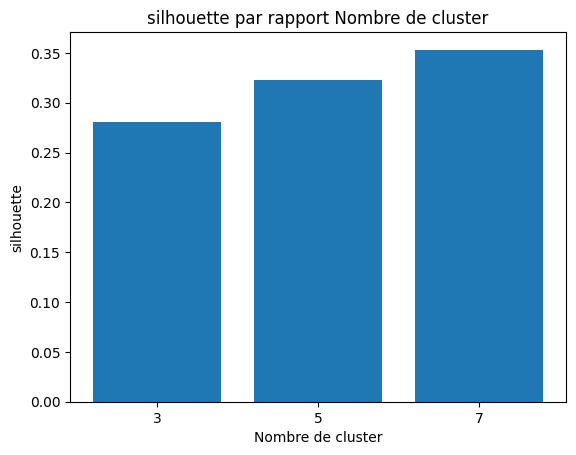

In [20]:
import matplotlib.pyplot as plt

# Données
x = ['3','5','7']
y = [silh1,silh2,silh3]

# Création du graphe linéaire
plt.bar(x, y)
plt.xlabel('Nombre de cluster')
plt.ylabel('silhouette')
plt.title('silhouette par rapport Nombre de cluster')
plt.show()

In [62]:
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

def range_query(data, point_index, epsilon):
    neighbors = []
    for i in range(len(data)):
        if i != point_index and euclidean_distance(data[point_index], data[i]) <= epsilon:
            neighbors.append(i)
    return neighbors

def dbscan(data, epsilon, min_pts):
    cluster_id = 0
    clusters = defaultdict(int)
    visited = set()

    for point_index in range(len(data)):
        if point_index not in visited:
            visited.add(point_index)
            neighbors = range_query(data, point_index, epsilon)
            
            if len(neighbors) < min_pts:
                clusters[point_index] = -1  # Point bruit (outlier)
            else:
                cluster_id += 1
                clusters[point_index] = cluster_id
                
                for neighbor_index in neighbors:
                    if neighbor_index not in visited:
                        visited.add(neighbor_index)
                        neighbor_neighbors = range_query(data, neighbor_index, epsilon)
                        
                        if len(neighbor_neighbors) >= min_pts:
                            neighbors.extend(neighbor_neighbors)
                    
                    if clusters[neighbor_index] == 0:
                        clusters[neighbor_index] = cluster_id

    return clusters

defaultdict(<class 'int'>, {0: 1, 10: 1, 12: 1, 13: 1, 14: 1, 37: 1, 41: 1, 43: 1, 48: 1, 49: 1, 61: 1, 76: 1, 83: 1, 110: 1, 122: 1, 142: 1, 151: 1, 160: 1, 167: 1, 169: 1, 172: 1, 173: 1, 247: 1, 255: 1, 258: 1, 265: 1, 384: 1, 392: 1, 397: 1, 406: 1, 421: 1, 465: 1, 616: 1, 620: 1, 11: 1, 39: 1, 94: 1, 96: 1, 224: 1, 331: 1, 387: 1, 589: 1, 593: 1, 619: 1, 104: 1, 123: 1, 157: 1, 177: 1, 233: 1, 485: 1, 3: 1, 124: 1, 226: 1, 237: 1, 249: 1, 587: 1, 119: 1, 2: 1, 77: 1, 109: 1, 120: 1, 159: 1, 178: 1, 209: 1, 228: 1, 253: 1, 400: 1, 594: 1, 175: 1, 34: 1, 193: 1, 299: 1, 352: 1, 376: 1, 404: 1, 427: 1, 506: 1, 664: 1, 189: 1, 273: 1, 356: 1, 413: 1, 483: 1, 462: 1, 16: 1, 35: 1, 42: 1, 74: 1, 78: 1, 165: 1, 170: 1, 171: 1, 222: 1, 267: 1, 274: 1, 373: 1, 428: 1, 542: 1, 641: 1, 810: 1, 825: 1, 826: 1, 101: 1, 161: 1, 166: 1, 190: 1, 214: 1, 246: 1, 366: 1, 469: 1, 475: 1, 628: 1, 667: 1, 796: 1, 71: 1, 112: 1, 115: 1, 135: 1, 143: 1, 155: 1, 162: 1, 163: 1, 221: 1, 240: 1, 250: 1, 25

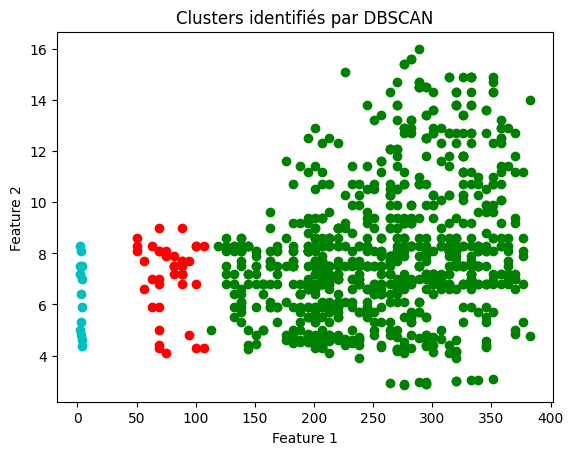

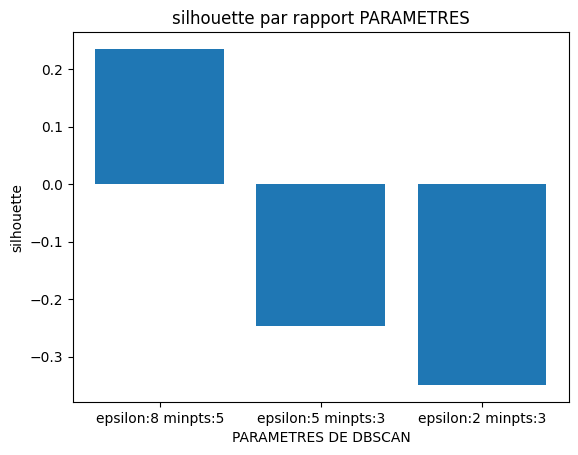

In [72]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from collections import defaultdict

# Génération de données avec deux lunes (deux clusters)


# Affichage des données initiales


# Fonction pour calculer la distance euclidienne
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

def range_query(data, point_index, epsilon):
    neighbors = []
    for i in range(len(data)):
        if i != point_index and euclidean_distance(data[point_index], data[i]) <= epsilon:
            neighbors.append(i)
    return neighbors

def dbscan(data, epsilon, min_pts):
    cluster_id = 0
    clusters = defaultdict(int)
    visited = set()
    for point_index in range(len(data)):
        if point_index not in visited:
            visited.add(point_index)
            neighbors = range_query(data, point_index, epsilon)
            if len(neighbors) < min_pts:
                clusters[point_index] = -1  # Point bruit (outlier)
            else:
                cluster_id += 1
                clusters[point_index] = cluster_id
                for neighbor_index in neighbors:
                    if neighbor_index not in visited:
                        visited.add(neighbor_index)
                        neighbor_neighbors = range_query(data, neighbor_index, epsilon)
                        if len(neighbor_neighbors) >= min_pts:
                            neighbors.extend(neighbor_neighbors)
                    
                    if clusters[neighbor_index] == 0:
                        clusters[neighbor_index] = cluster_id
    return clusters

# Utilisation de DBSCAN sur les données générées
epsilon = 8 # Rayon
min_pts = 5     # Nombre minimum de points dans un voisinage
X=np.array(X)
result_clusters = dbscan(X, epsilon, min_pts)
result_clusters1=dbscan(X,epsilon=5,min_pts=3)
result_clusters2=dbscan(X,epsilon=2,min_pts=3)
print(result_clusters)
from sklearn.metrics import silhouette_samples

# Calculer la silhouette pour les clusters identifiés par DBSCAN
def compute_dbscan_silhouette(data, clusters):
    # Filtrer les points appartenant à de vrais clusters (exclure les points de bruit - cluster_id = -1)
    valid_clusters = {point_index: cluster_id for point_index, cluster_id in clusters.items() if cluster_id != -1}
    valid_data = data[list(valid_clusters.keys())]

    # Calculer la silhouette
    silhouette_vals = silhouette_samples(valid_data, list(valid_clusters.values()), metric='euclidean')

    return silhouette_vals

from sklearn.metrics import pairwise_distances

def compute_intra_cluster_distances(X, labels):
    # Calculer les distances euclidiennes entre les points
    distances = pairwise_distances(X)
    n_samples = len(X)
    intra_cluster_distances = {}

    for i in range(n_samples):
        cluster_label = labels[i]
        mask = labels == cluster_label
        cluster_points = X[mask]
        intra_cluster_distances[i] = np.mean(distances[i, mask])

    return intra_cluster_distances

# Utilisation de la fonction pour calculer les distances intra-cluster
intra_cluster_distances = compute_intra_cluster_distances(X, result_clusters)
print("Distances intra-cluster pour chaque point:", intra_cluster_distances)


# Calculer la silhouette pour les clusters identifiés par DBSCAN
silhouette_vals = compute_dbscan_silhouette(X, result_clusters)
silhouette_vals1 = compute_dbscan_silhouette(X, result_clusters1)
silhouette_vals2 = compute_dbscan_silhouette(X, result_clusters2)

# Afficher les valeurs de silhouette

print("Average silhouette score for valid clusters identified by DBSCAN:", np.mean(silhouette_vals))
# Affichage des clusters identifiés
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for point_index, cluster_id in result_clusters.items():
    if cluster_id == -1:
        plt.scatter(X[point_index, 0], X[point_index, 1], color='gray', marker='o')
    else:
        plt.scatter(X[point_index, 0], X[point_index, 1], color=colors[cluster_id % len(colors)], marker='o')

plt.title("Clusters identifiés par DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


x = ['epsilon:8 minpts:5','epsilon:5 minpts:3','epsilon:2 minpts:3']
y = [np.mean(silhouette_vals),np.mean(silhouette_vals1),np.mean(silhouette_vals2)]

# Création du graphe linéaire
plt.bar(x, y)
plt.xlabel('PARAMETRES DE DBSCAN')
plt.ylabel('silhouette')
plt.title('silhouette par rapport PARAMETRES')
plt.show()


In [ ]:
x = ['K_MEANS','DBSCAN']
y = [silh1,np.mean(silhouette_vals)]

# Création du graphe linéaire
plt.bar(x, y)
plt.xlabel('function')
plt.ylabel('silhouette')
plt.title('silhouette par rapport a la function utiliser')
plt.show()